# Ford car data prediction

### Objectives
(A) Load the data, 
(B) Perform Label Encoding or One-hot Encoding (Explain which one is best suitable for your analysis) 
(C) Split the original dataset into the train set (80%) and the test set (20%), 
(D) Perform Linear Regression and Predict the 'Price' from the test set, 
(E) Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model. (Interpret the coefficients) 
(F) Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable. 
(G) Compare the actual and predicted target variable through visualization

#### Data source:https://github.com/SKawsar/Data_Visualization_with_Python
Original data source:https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

###### Importing Libraries

In [352]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')

###### Importing and analyzing data 

In [353]:
df = pd.read_csv("ford.csv")

display(df.head(10))
print(df.shape)
print(df.info())
print(df.columns)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


In [354]:
features = ['mileage', 'year', 'mpg', 'engineSize']
target = ['price']

X = df[features]
y = df[target]

print(X.shape, y.shape)

(17964, 4) (17964, 1)


###### Train and test set

In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14371, 4) (3593, 4) (14371, 1) (3593, 1)


###### Linear Regression & predicting the 'Price' from the test set

In [356]:
model = LinearRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_test)

       price
13547   6400
15279  15789
11461  18999
7371   18495
1860    8298
...      ...
11836  18800
14032  12490
6568   17995
16025   8899
4651    9650

[3593 rows x 1 columns]


###### Coefficients linear regression model for each feature

In [357]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
2,mpg,-85.158287
0,mileage,-0.051506
1,year,1299.650392
3,engineSize,5348.406192


In [358]:
model.intercept_

array([-2610035.57221773])

###### MAE, MAPE, MSE, RMSE

In [359]:
y_pred = model.predict(X_test)

In [360]:
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)


mean absolute error =  1738.4279581479911
mean squared error =  5846078.303366292
root mean squared error =  2417.8664775719712
coefficient of determination =  0.7330330800291481


###### Comparing the actual and predicted target variable through visualization

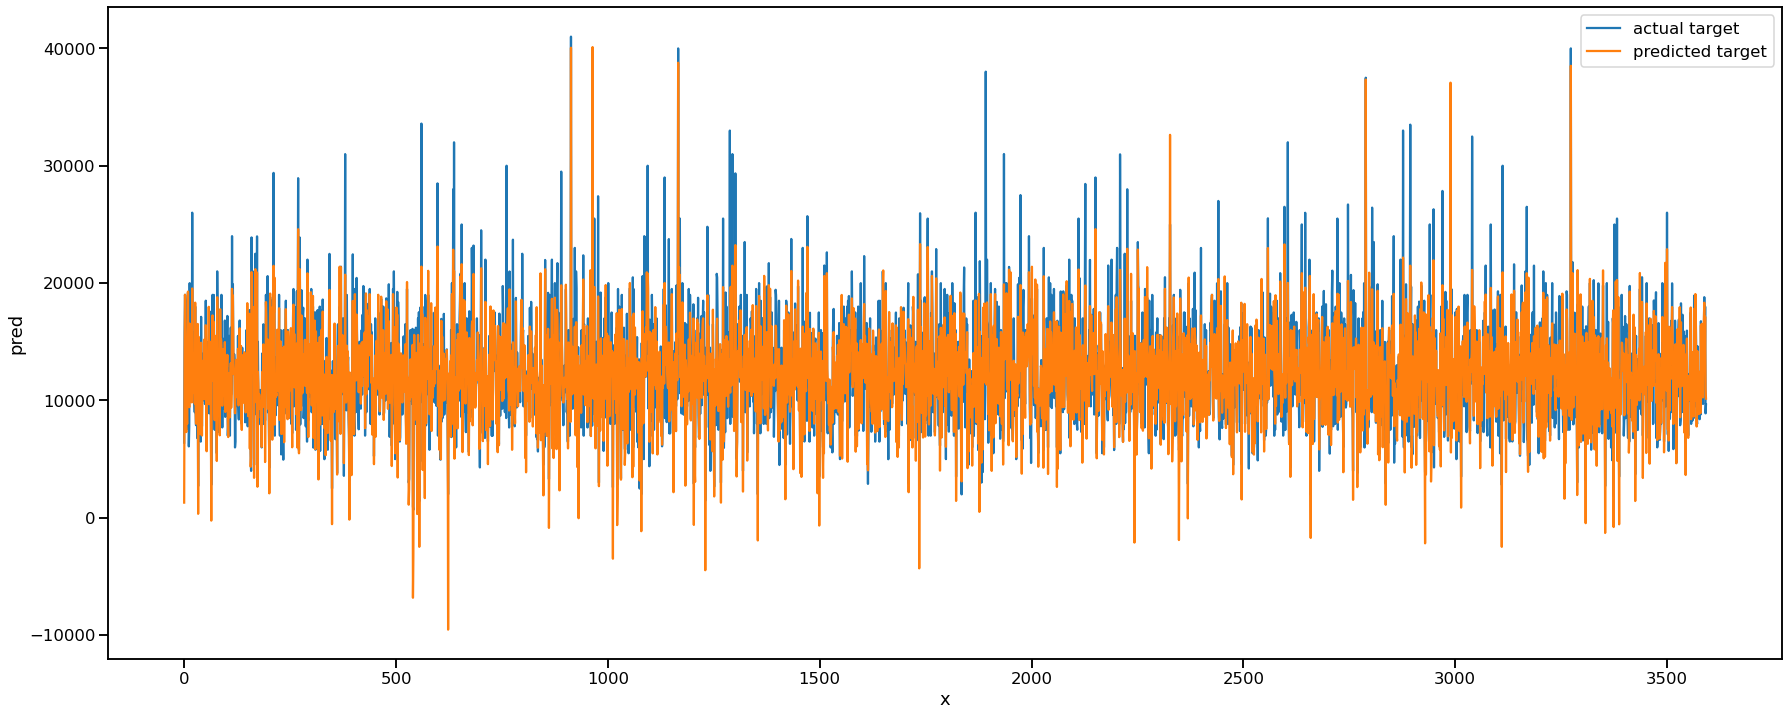

In [361]:
y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()


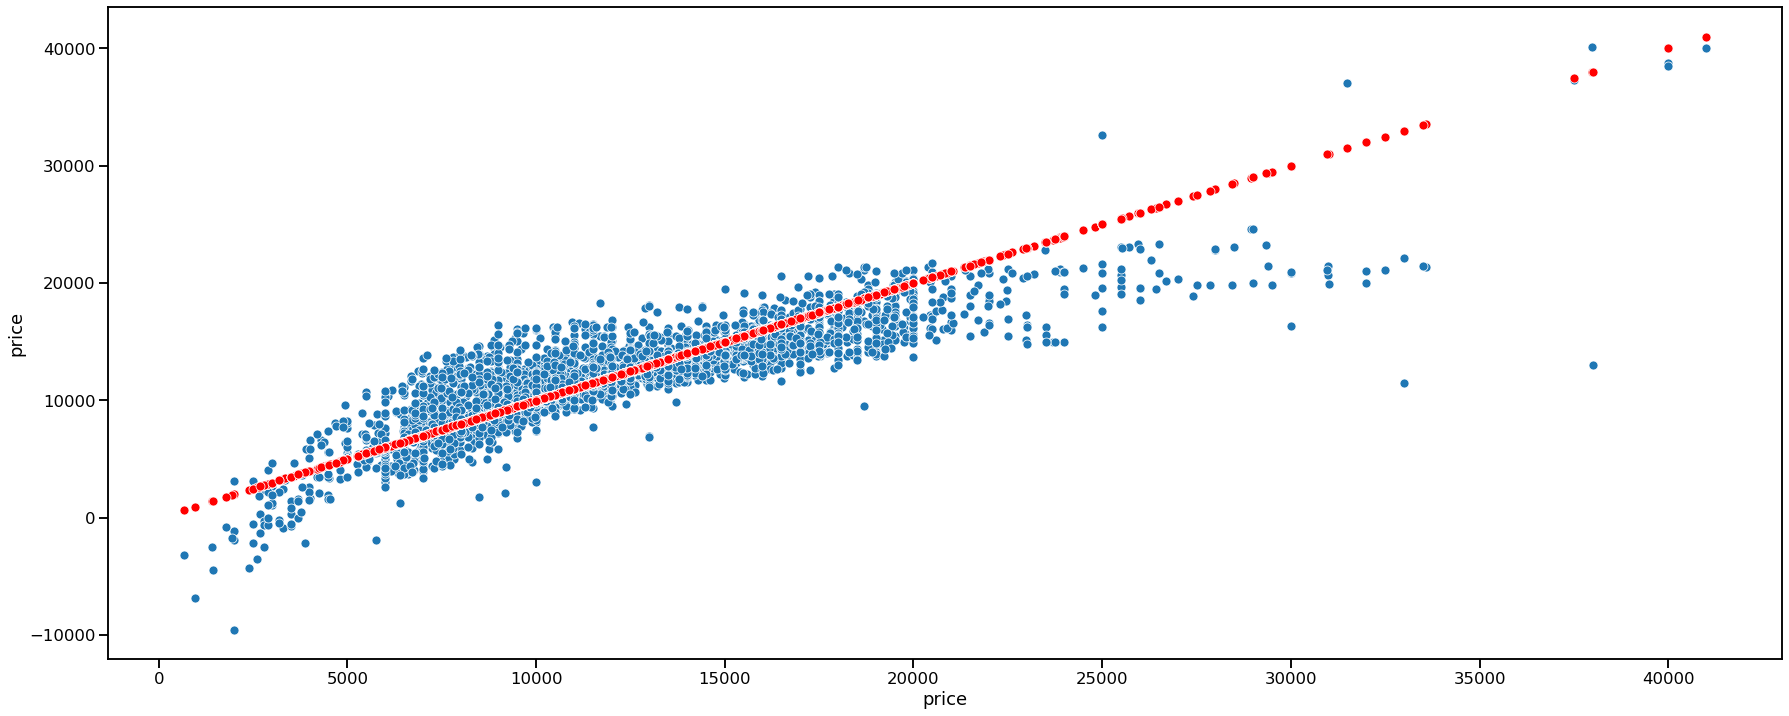

In [362]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()